# Explore here

1. Recopilación de datos

In [44]:
#Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.
import pandas as pd 

#Recopila los datos del archivo csv
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

#Lee las tablas 
pd.set_option("display.max_columns", None)
data

#Nuestra variable objetivo sera Heart disease_prevalence

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

In [45]:
#Se guardan el archivo

data.to_csv("../data/raw/recursos-salud.csv")

2. Exploración y limpieza de datos

In [46]:
#Dimension del Dataframe 
data.shape

#Tenemos 108 columnas y 3140 filas

(3140, 108)

In [47]:
#Revisar si existe un valor nulo 
print(data.isnull().values.any())

#No existen valores nulos 

False


In [48]:
data = data.drop_duplicates().reset_index(drop = True)

data.shape

#No existian datos duplicados , ya que nos retorno la misma cantidad de filas 

(3140, 108)

In [49]:
#Factorizar todas las variables categoricas 

for col in data.select_dtypes(include=['object']).columns:
    data[col],_ = pd.factorize(data[col])



In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Variable objetivo
X = data.drop("Heart disease_prevalence", axis=1)
y = data["Heart disease_prevalence"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionar las mejores variables
selector = SelectKBest(score_func=f_regression, k=6)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]

# Guardar los datos seleccionados en DataFrames
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_columns, index=X_train.index)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_columns, index=X_test.index)

# Añadir la columna "Native American/American Indian-alone pop" al conjunto de entrenamiento y prueba
X_train_selected_df["Native American/American Indian-alone pop"] = X_train["Native American/American Indian-alone pop"]
X_test_selected_df["Native American/American Indian-alone pop"] = X_test["Native American/American Indian-alone pop"]

# Añadir la variable objetivo al conjunto de entrenamiento y prueba
X_train_selected_df["Heart disease_prevalence"] = y_train
X_test_selected_df["Heart disease_prevalence"] = y_test

# Concatenar los DataFrames
data_mod = pd.concat([X_train_selected_df, X_test_selected_df], axis=0)

# Mostrar las primeras filas del nuevo DataFrame
data_mod.head()


,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Upper 95% CI,CKD_prevalence,CKD_Upper 95% CI,Native American/American Indian-alone pop,Heart disease_prevalence
1292,9.1,11.1,11.3,13.0,3.8,4.1,428,10.1
2302,8.2,10.1,9.9,11.5,3.5,3.8,109,9.2
761,6.6,8.1,9.2,10.4,2.9,3.1,135,7.3
2194,7.1,8.5,8.1,9.3,3.0,3.2,12403,7.8
1241,7.7,9.1,9.6,11.0,3.4,3.6,1047,8.4


In [51]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3140 entries, 1292 to 2650
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Heart disease_Lower 95% CI                 3140 non-null   float64
 1   Heart disease_Upper 95% CI                 3140 non-null   float64
 2   COPD_prevalence                            3140 non-null   float64
 3   COPD_Upper 95% CI                          3140 non-null   float64
 4   CKD_prevalence                             3140 non-null   float64
 5   CKD_Upper 95% CI                           3140 non-null   float64
 6   Native American/American Indian-alone pop  3140 non-null   int64  
 7   Heart disease_prevalence                   3140 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 220.8 KB


3. Análisis de variables multivariadas

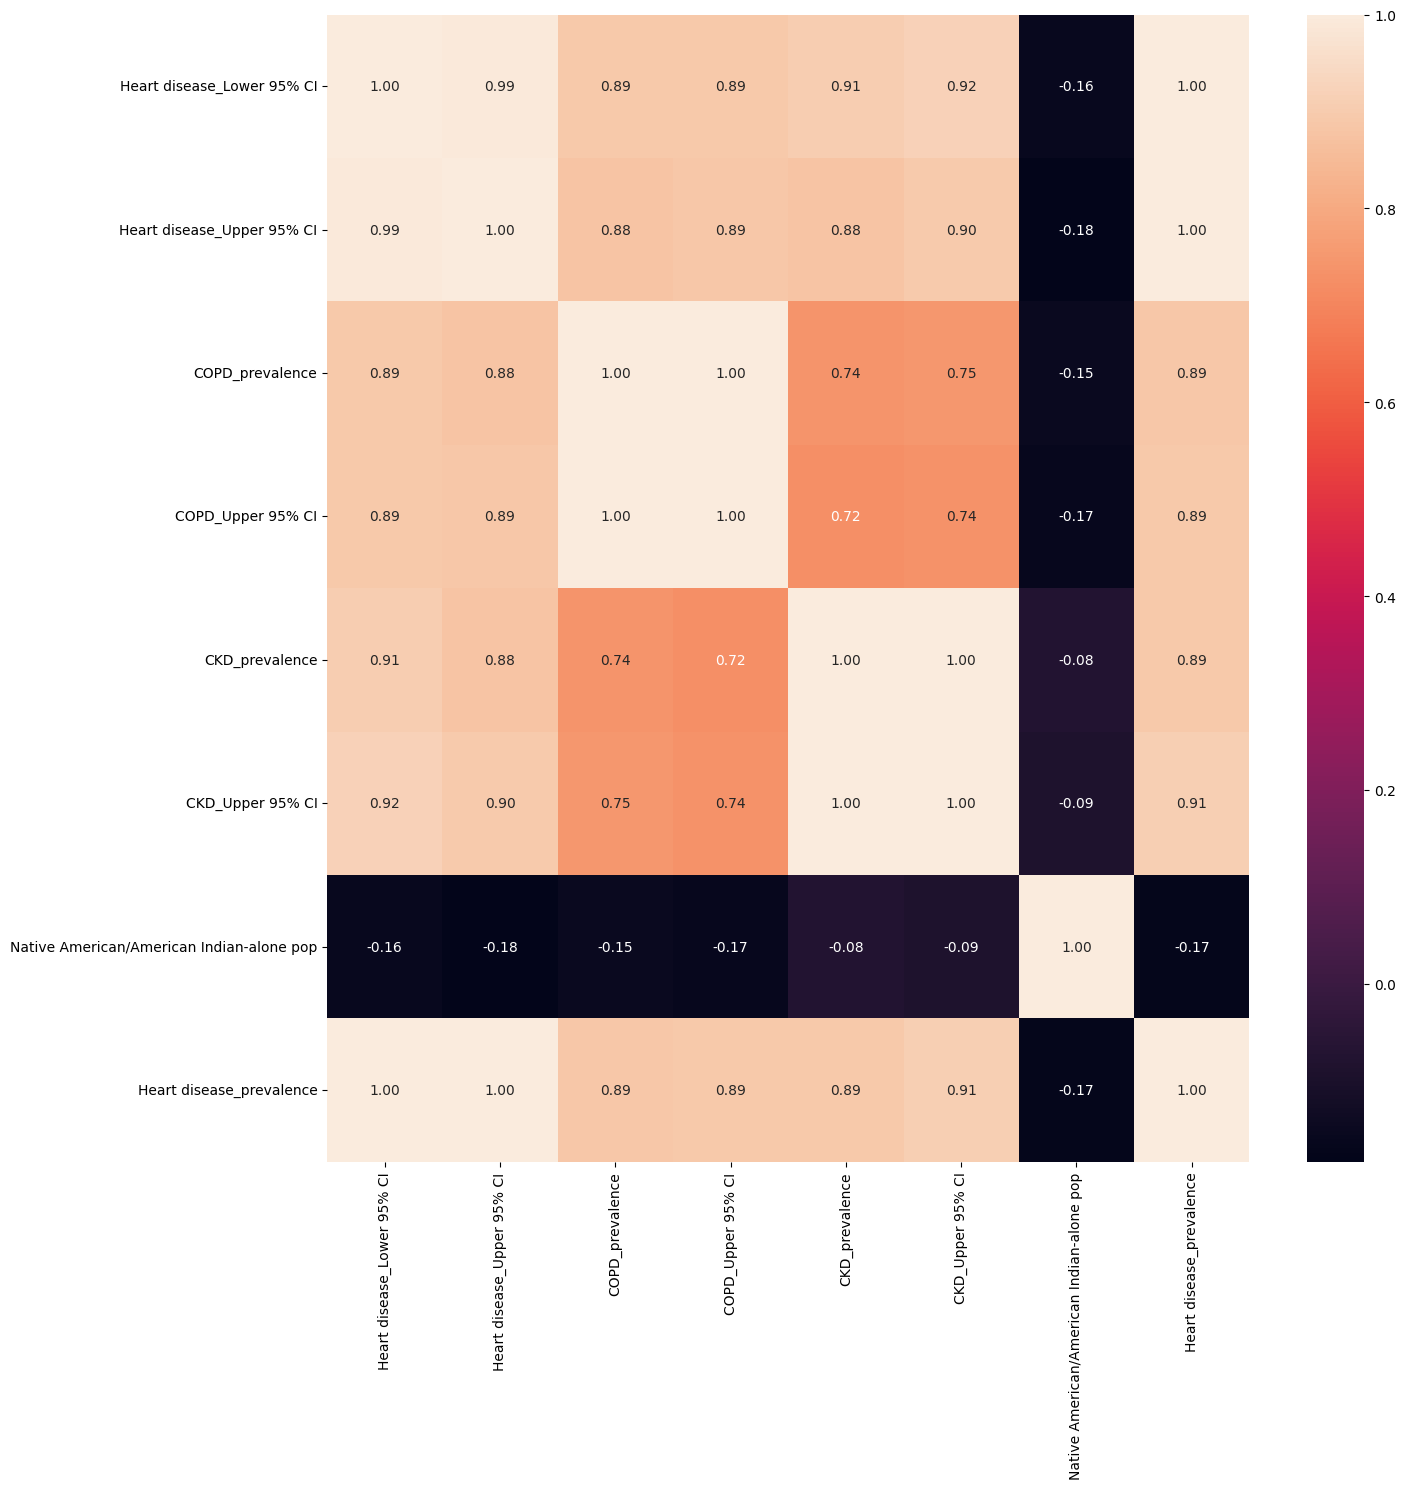

In [52]:
#Análisis de correlaciones

#El objetivo del código es crear un heatmap de correlación que muestre la relación entre diferentes variables del dataset.


import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data_mod.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Muestra el grafico
plt.show()

#Observamos 
# Cada una de las variables muestra una coorelacion positiva y fuerte con la variable objetivo . Siendo la mas fuerte la de Heart disease_Upper 95% CI con un 0.99 
# Sin embargo al revisar la parte demografica notamos que es baja y negativa . Quiere decir que no tiene la prevalencia de enfermedad cardica una relacion fuerte 

In [53]:
#se imprime elementos del dataframe
data_mod.columns

Index(['Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
       'COPD_prevalence', 'COPD_Upper 95% CI', 'CKD_prevalence',
       'CKD_Upper 95% CI', 'Native American/American Indian-alone pop',
       'Heart disease_prevalence'],
      dtype='object')

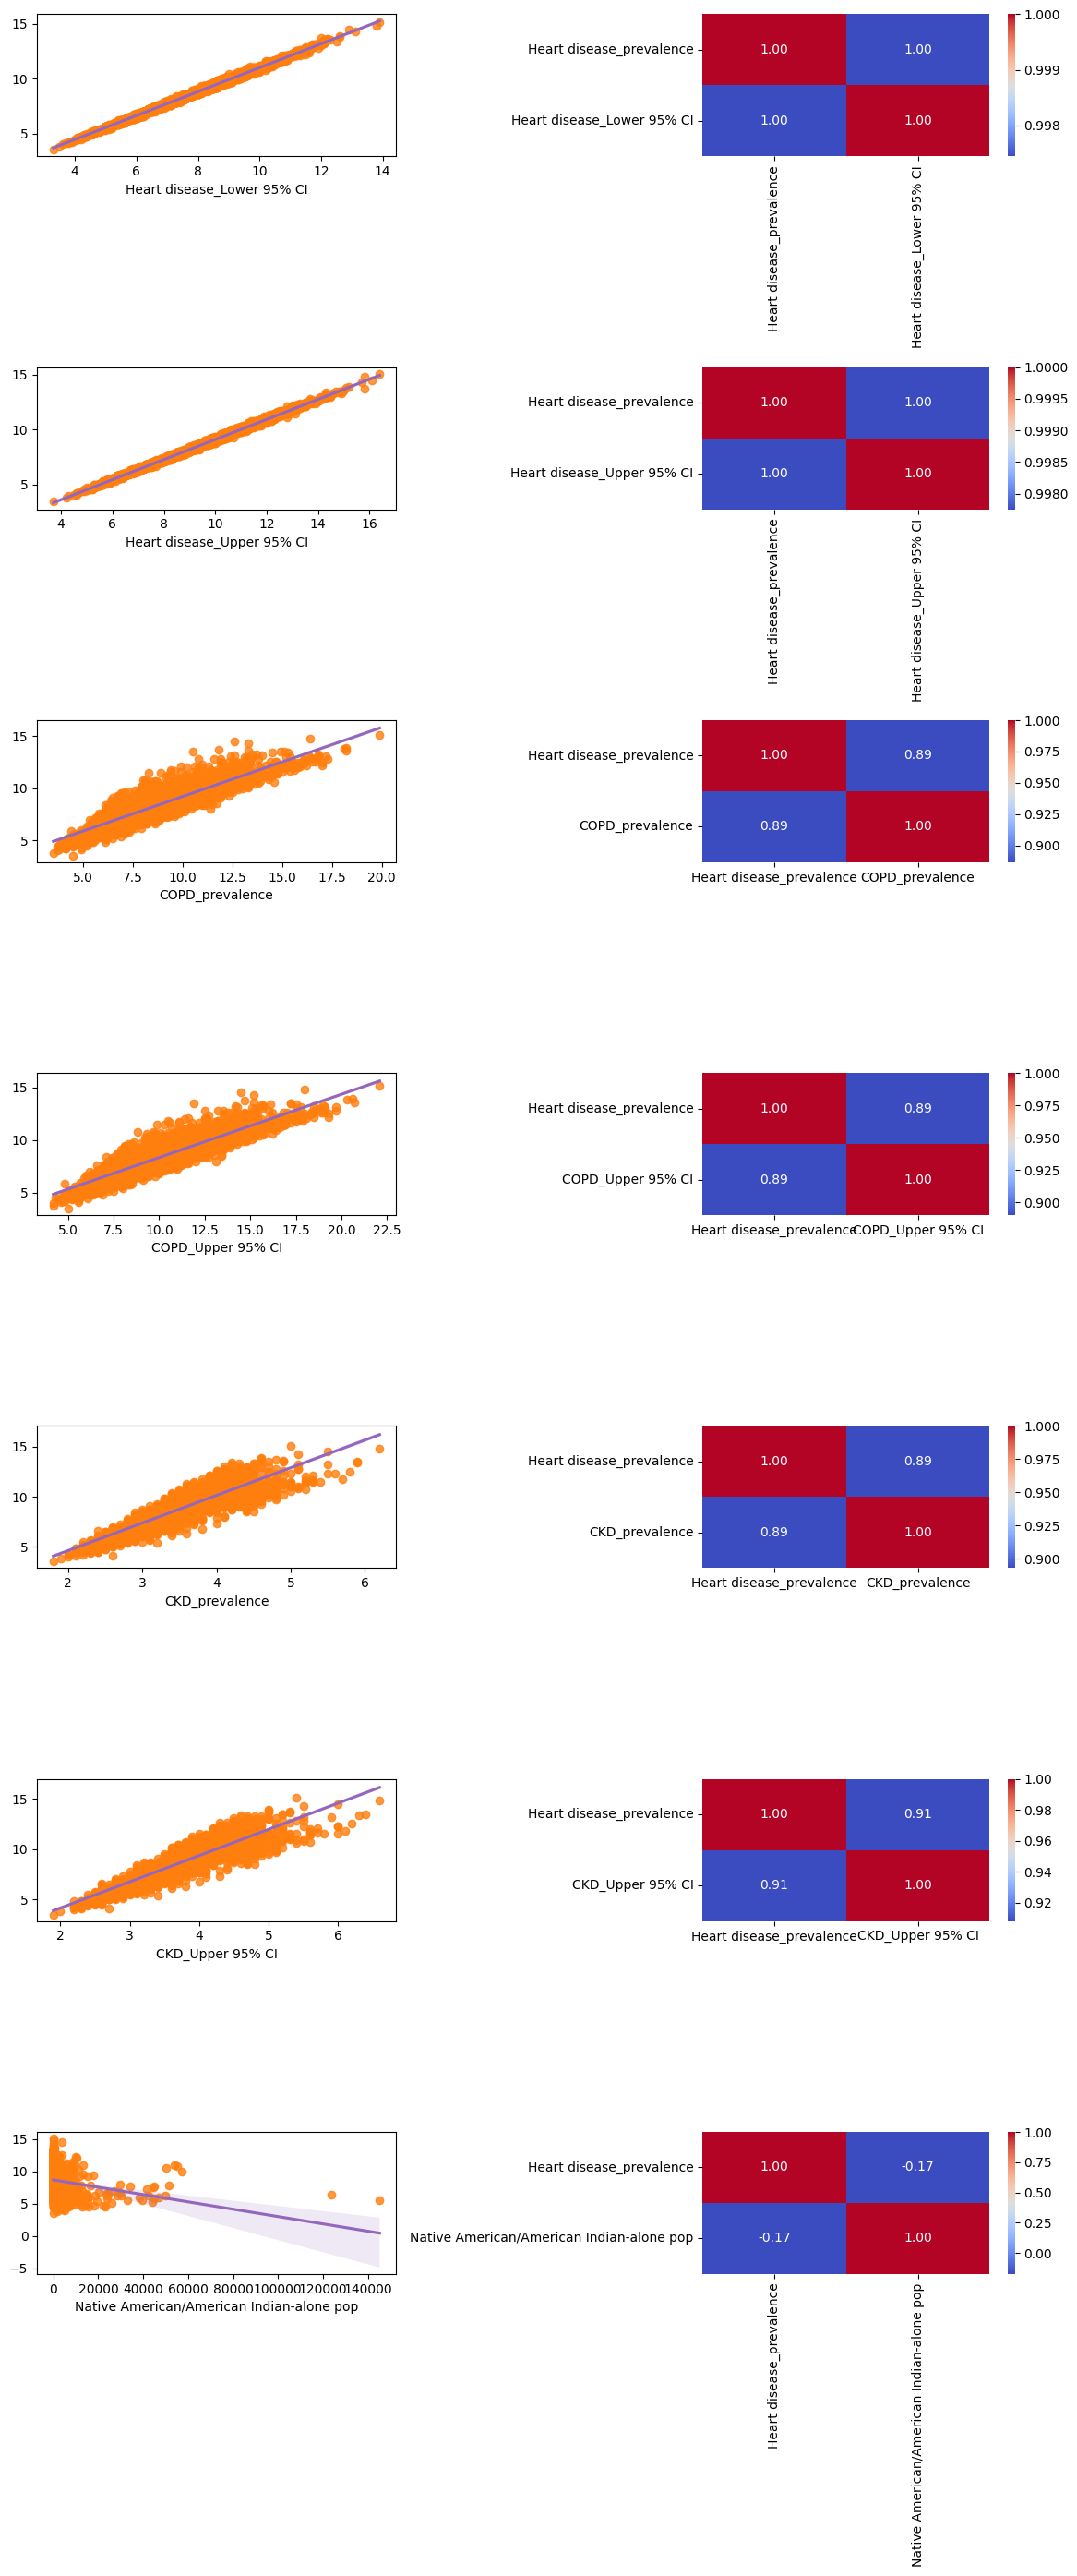

In [54]:
# Crear la figura y los ejes (7 filas, 2 columnas)
fig, axis = plt.subplots(7, 2, figsize=(12, 28))

# Lista de variables a graficar
variables = [
    'Heart disease_Lower 95% CI', 
    'Heart disease_Upper 95% CI',
    'COPD_prevalence', 
    'COPD_Upper 95% CI', 
    'CKD_prevalence', 
    'CKD_Upper 95% CI', 
    'Native American/American Indian-alone pop'
]

# Iterar sobre cada variable y graficar regplot y heatmap
for i, var in enumerate(variables):
    # Regplot (Gráfico de regresión)
    sns.regplot(ax=axis[i, 0], data=data_mod, x=var, y="Heart disease_prevalence", 
                scatter_kws={'color': '#ff7f0e'}, line_kws={'color': '#9467bd'}).set(ylabel=None)
    
    # Heatmap (Mapa de calor de correlación)
    sns.heatmap(data_mod[["Heart disease_prevalence", var]].corr(), annot=True, fmt=".2f", 
                ax=axis[i, 1], cmap='coolwarm')

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#Se observa 
#una corelacion muy fuerte entre las variables 
# Sin embargo la variable Native American/American Indian-alone tiene una corelacion negativa y baja de- 0.17




4.Ingeniería de características

In [55]:
data_mod.describe()

,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Upper 95% CI,CKD_prevalence,CKD_Upper 95% CI,Native American/American Indian-alone pop,Heart disease_prevalence
count,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,7.81207,9.454395,9.095223,10.438567,3.446242,3.710478,1320.231210,8.607803
std,1.60931,1.920387,2.344965,2.613920,0.568059,0.613069,5362.395724,1.758587
min,3.30000,3.700000,3.500000,4.200000,1.800000,1.900000,0.000000,3.500000
25%,6.70000,8.200000,7.300000,8.500000,3.100000,3.300000,73.000000,7.400000
50%,7.80000,9.400000,8.900000,10.300000,3.400000,3.700000,199.000000,8.600000
75%,8.90000,10.700000,10.600000,12.100000,3.800000,4.100000,666.000000,9.800000
max,13.90000,16.400000,19.900000,22.100000,6.200000,6.600000,145254.000000,15.100000


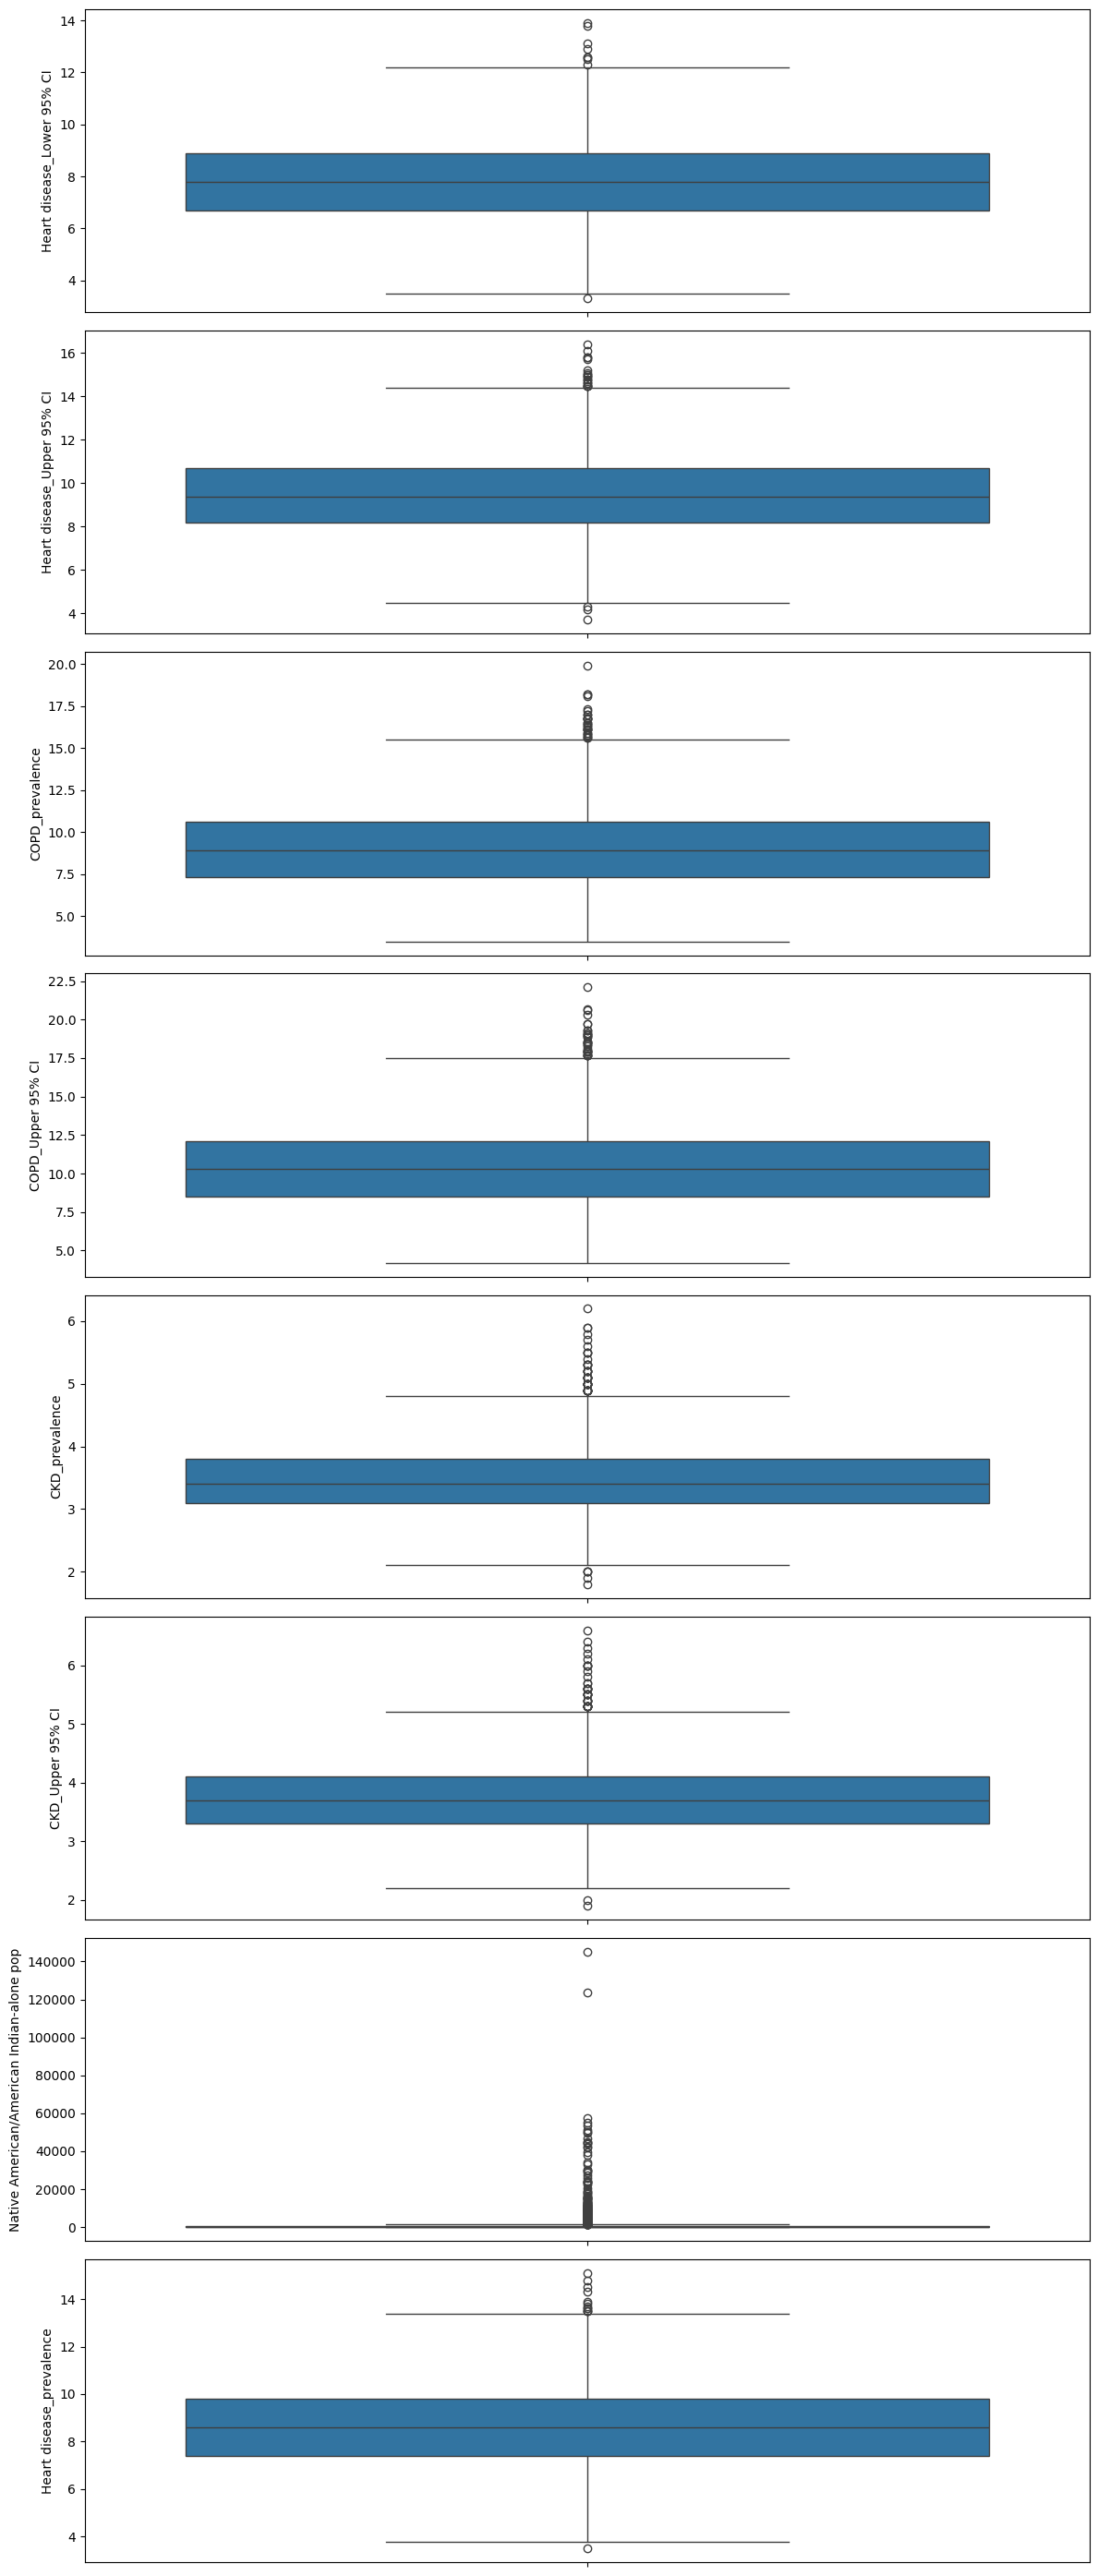

In [56]:
# Crear la figura y los ejes (7 filas, 1 columna)
fig, axis = plt.subplots(8, 1, figsize=(12, 28))

# Lista de variables a graficar
variables = [
    'Heart disease_Lower 95% CI', 
    'Heart disease_Upper 95% CI',
    'COPD_prevalence', 
    'COPD_Upper 95% CI', 
    'CKD_prevalence', 
    'CKD_Upper 95% CI', 
    'Native American/American Indian-alone pop',
    'Heart disease_prevalence'
]

# Iterar sobre cada variable y graficar boxplot
for i, var in enumerate(variables):
    # Boxplot
    sns.boxplot(ax=axis[i], data=data_mod, y=var)
   

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Existen varios outliers , siendo valores atipicos que pueden afectar nuestro modelo. El que mas posee estos valores es Native American/American Indian-alone pop

Limpiamos los outliers 

In [57]:
data_mod.columns

Index(['Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI',
       'COPD_prevalence', 'COPD_Upper 95% CI', 'CKD_prevalence',
       'CKD_Upper 95% CI', 'Native American/American Indian-alone pop',
       'Heart disease_prevalence'],
      dtype='object')

In [58]:
#Primero revisamos los datos de age (Q, media , sdt)

heart_des_l = data_mod["Heart disease_Lower 95% CI"].describe()
heart_des_l

count    3140.00000
mean        7.81207
std         1.60931
min         3.30000
25%         6.70000
50%         7.80000
75%         8.90000
max        13.90000
Name: Heart disease_Lower 95% CI, dtype: float64

In [59]:
# IQR 

heart_l_iqr = heart_des_l["75%"] - heart_des_l["25%"]

upper_limit = heart_des_l["75%"] + 1.5 * heart_l_iqr
lower_limit = heart_des_l["25%"] - 1.5 * heart_l_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("heart_l_iqr: ", heart_l_iqr )

upper_limit :  12.200000000000001
lower_limit :  3.4
heart_l_iqr:  2.2


In [60]:
# Limpieza de outliers

data_mod = data_mod[(data_mod["Heart disease_Lower 95% CI"] <= 12.200000000000001) & (data_mod["Heart disease_Lower 95% CI"] >= 3.4)]

In [61]:
#Primero revisamos los datos de age (Q, media , sdt)

heart_des_u = data_mod["Heart disease_Upper 95% CI"].describe()
heart_des_u

count    3131.000000
mean        9.440977
std         1.896185
min         4.200000
25%         8.200000
50%         9.400000
75%        10.700000
max        15.800000
Name: Heart disease_Upper 95% CI, dtype: float64

In [62]:
# IQR 

heart_u_iqr = heart_des_u["75%"] - heart_des_u["25%"]

upper_limit = heart_des_u["75%"] + 1.5 * heart_u_iqr
lower_limit = heart_des_u["25%"] - 1.5 * heart_u_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("heart_u_iqr: ", heart_u_iqr )

upper_limit :  14.45
lower_limit :  4.449999999999999
heart_u_iqr:  2.5


In [63]:
# Limpieza de outliers

data_mod = data_mod[(data_mod["Heart disease_Upper 95% CI"] <= 14.45) & (data_mod["Heart disease_Upper 95% CI"] >=4.449999999999999)]

In [64]:
#Primero revisamos los datos de age (Q, media , sdt)

copd_des = data_mod["COPD_prevalence"].describe()
copd_des

count    3116.000000
mean        9.060976
std         2.290729
min         3.700000
25%         7.300000
50%         8.900000
75%        10.600000
max        17.300000
Name: COPD_prevalence, dtype: float64

In [65]:
# IQR 

copd_iqr = copd_des["75%"] - copd_des["25%"]

upper_limit = copd_des["75%"] + 1.5 * copd_iqr
lower_limit = copd_des["25%"] - 1.5 * copd_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("copd_iqr: ", copd_iqr )

upper_limit :  15.549999999999999
lower_limit :  2.3500000000000005
copd_iqr:  3.3


In [66]:
# Limpieza de outliers

data_mod = data_mod[(data_mod["COPD_prevalence"] <= 15.549999999999999) & (data_mod["COPD_prevalence"] >=2.3500000000000005)]

In [67]:
#Primero revisamos los datos de age (Q, media , sdt)

copd_u_des = data_mod["COPD_Upper 95% CI"].describe()
copd_u_des

count    3093.000000
mean       10.339024
std         2.461185
min         4.300000
25%         8.500000
50%        10.300000
75%        12.000000
max        17.700000
Name: COPD_Upper 95% CI, dtype: float64

In [68]:
# IQR 

copd_u_iqr = copd_u_des["75%"] - copd_u_des["25%"]

upper_limit = copd_u_des["75%"] + 1.5 * copd_u_iqr
lower_limit = copd_u_des["25%"] - 1.5 * copd_u_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("copd_u_iqr: ", copd_u_iqr )

upper_limit :  17.25
lower_limit :  3.25
copd_u_iqr:  3.5


In [69]:
# Limpieza de outliers

data_mod = data_mod[(data_mod["COPD_Upper 95% CI"] <= 17.25) & (data_mod["COPD_Upper 95% CI"] >=3.25)]

In [70]:
#Primero revisamos los datos de age (Q, media , sdt)

ckd_p_des = data_mod["CKD_prevalence"].describe()
ckd_p_des

count    3083.000000
mean        3.430717
std         0.552242
min         2.000000
25%         3.100000
50%         3.400000
75%         3.800000
max         5.800000
Name: CKD_prevalence, dtype: float64

In [71]:
# IQR 

ckd_p_iqr = ckd_p_des["75%"] - ckd_p_des["25%"]

upper_limit = ckd_p_des["75%"] + 1.5 * ckd_p_iqr
lower_limit = ckd_p_des["25%"] - 1.5 * ckd_p_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("ckd_p_iqr: ", ckd_p_iqr)

upper_limit :  4.85
lower_limit :  2.0500000000000007
ckd_p_iqr:  0.6999999999999997


In [72]:
# Limpieza de outliers

data_mod = data_mod[(data_mod["CKD_prevalence"] <= 4.85) & (data_mod["CKD_prevalence"] >=2.0500000000000007)]

In [73]:
#Primero revisamos los datos de age (Q, media , sdt)

ckd_u_des = data_mod["CKD_Upper 95% CI"].describe()
ckd_u_des

count    3045.000000
mean        3.672184
std         0.561545
min         2.200000
25%         3.300000
50%         3.700000
75%         4.000000
max         5.200000
Name: CKD_Upper 95% CI, dtype: float64

In [74]:
# IQR 

ckd_u_iqr = ckd_u_des["75%"] - ckd_u_des["25%"]

upper_limit = ckd_u_des["75%"] + 1.5 * ckd_u_iqr
lower_limit = ckd_u_des["25%"] - 1.5 * ckd_u_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("ckd_u_iqr: ", ckd_u_iqr)

upper_limit :  5.050000000000001
lower_limit :  2.2499999999999996
ckd_u_iqr:  0.7000000000000002


In [75]:
# Limpieza de outliers

data_mod = data_mod[(data_mod["CKD_Upper 95% CI"] <=5.050000000000001) & (data_mod["CKD_Upper 95% CI"] >=2.2499999999999996)]

In [76]:
#Primero revisamos los datos de age (Q, media , sdt)

demo_des = data_mod["Native American/American Indian-alone pop"].describe()
demo_des

count      3019.000000
mean       1319.433256
std        5275.155410
min           0.000000
25%          77.000000
50%         209.000000
75%         687.000000
max      145254.000000
Name: Native American/American Indian-alone pop, dtype: float64

In [77]:
# IQR 

demo_iqr = demo_des["75%"] - demo_des["25%"]

upper_limit = demo_des["75%"] + 1.5 * demo_iqr
lower_limit = demo_des["25%"] - 1.5 * demo_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("demo_iqr: ", demo_iqr)

upper_limit :  1602.0
lower_limit :  -838.0
demo_iqr:  610.0


In [78]:
# Limpieza de outliers

data_mod = data_mod[(data_mod["Native American/American Indian-alone pop"] <=1602.0) & (data_mod["Native American/American Indian-alone pop"] >=0)]

In [79]:
#Primero revisamos los datos de age (Q, media , sdt)

heart_des = data_mod["Heart disease_prevalence"].describe()
heart_des

count    2573.000000
mean        8.660863
std         1.529316
min         4.400000
25%         7.700000
50%         8.600000
75%         9.700000
max        13.000000
Name: Heart disease_prevalence, dtype: float64

In [80]:
# IQR 

heart_iqr = heart_des["75%"] - heart_des["25%"]

upper_limit = heart_des["75%"] + 1.5 * heart_iqr
lower_limit = heart_des["25%"] - 1.5 * heart_iqr

print("upper_limit : ", upper_limit)
print("lower_limit : ", lower_limit)
print("heart_iqr: ", heart_iqr)

upper_limit :  12.699999999999998
lower_limit :  4.700000000000001
heart_iqr:  1.9999999999999991


In [81]:
# Limpieza de outliers

data_mod = data_mod[(data_mod["Heart disease_prevalence"] <=12.699999999999998) & (data_mod["Heart disease_prevalence"] >= 4.700000000000001)]

In [82]:
data_mod.isnull().sum().sort_values(ascending = False)

# Refleja que no tiene datos nulos 

Heart disease_Lower 95% CI                   0
Heart disease_Upper 95% CI                   0
COPD_prevalence                              0
COPD_Upper 95% CI                            0
CKD_prevalence                               0
CKD_Upper 95% CI                             0
Native American/American Indian-alone pop    0
Heart disease_prevalence                     0
dtype: int64

Escalado de funciones 

In [83]:
# Se normaliza las variapbles para que tengan un rango estandar de [1, 0]

from sklearn.preprocessing import MinMaxScaler

variables = [
    'Heart disease_Lower 95% CI', 
    'Heart disease_Upper 95% CI',
    'COPD_prevalence', 
    'COPD_Upper 95% CI', 
    'CKD_prevalence', 
    'CKD_Upper 95% CI', 
    'Native American/American Indian-alone pop',
    'Heart disease_prevalence'
]

scaler = MinMaxScaler()

scal_features = scaler.fit_transform(data_mod[variables])

df_scal = pd.DataFrame(scal_features, index = data_mod.index, columns = variables)

df_scal.head()

,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Upper 95% CI,CKD_prevalence,CKD_Upper 95% CI,Native American/American Indian-alone pop,Heart disease_prevalence
1292,0.657534,0.670455,0.654545,0.658537,0.653846,0.666667,0.268003,0.679487
2302,0.534247,0.556818,0.527273,0.536585,0.538462,0.555556,0.068253,0.564103
761,0.315068,0.329545,0.463636,0.447154,0.307692,0.296296,0.084534,0.320513
1241,0.465753,0.443182,0.500000,0.495935,0.500000,0.481481,0.655604,0.461538
543,0.561644,0.534091,0.590909,0.569106,0.692308,0.666667,0.045711,0.551282


In [84]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

# Separar variables y variable objetivo
X = df_scal.drop("Heart disease_prevalence", axis=1)
y = df_scal["Heart disease_prevalence"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleccionar las mejores variables usando f_regression
selection_model = SelectKBest(score_func=f_regression)  

# Ajustar el modelo al conjunto de entrenamiento
X_train_sel = selection_model.fit_transform(X_train, y_train)

# Transformar el conjunto de prueba usando el modelo ajustado
X_test_sel = selection_model.transform(X_test)

# Obtener las columnas seleccionadas
selected_columns = X_train.columns[selection_model.get_support()]

# Crear DataFrames con las variables seleccionadas para el conjunto de entrenamiento y prueba
X_train_sel_df = pd.DataFrame(X_train_sel, columns=selected_columns, index=X_train.index)
X_test_sel_df = pd.DataFrame(X_test_sel, columns=selected_columns, index=X_test.index)

# Mostrar el resultado
X_train_sel_df.head()


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Upper 95% CI,CKD_prevalence,CKD_Upper 95% CI,Native American/American Indian-alone pop
2554,0.684932,0.681818,0.563636,0.552846,0.730769,0.740741,0.125861
1678,0.356164,0.375000,0.318182,0.317073,0.423077,0.407407,0.354415
1663,0.369863,0.386364,0.290909,0.292683,0.384615,0.370370,0.022542
700,0.095890,0.136364,0.227273,0.243902,0.115385,0.111111,0.117721
602,0.095890,0.079545,0.172727,0.154472,0.153846,0.111111,0.477771


In [85]:
#Se guardan los datos de entrenamiento y de test
X_train_sel_df["Heart disease_prevalence"] = y_train.values
X_test_sel_df["Heart disease_prevalence"] = y_test.values
X_train_sel_df.to_csv("../data/processed/train.csv", index = False)
X_test_sel_df.to_csv("../data/processed/test.csv", index = False)

Modelo de regresión logística

In [86]:
train_data = pd.read_csv("../data/processed/train.csv")
test_data = pd.read_csv("../data/processed/test.csv")

train_data.head()

,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Upper 95% CI,CKD_prevalence,CKD_Upper 95% CI,Native American/American Indian-alone pop,Heart disease_prevalence
0,0.684932,0.681818,0.563636,0.552846,0.730769,0.740741,0.125861,0.705128
1,0.356164,0.375000,0.318182,0.317073,0.423077,0.407407,0.354415,0.358974
2,0.369863,0.386364,0.290909,0.292683,0.384615,0.370370,0.022542,0.384615
3,0.095890,0.136364,0.227273,0.243902,0.115385,0.111111,0.117721,0.102564
4,0.095890,0.079545,0.172727,0.154472,0.153846,0.111111,0.477771,0.076923
